# Diabetes Markov Model: Simulating Patient Outcomes

## 1. Introduction
Simulates diabetes progression using a Markov model with real data from the Kaggle NIDDK dataset



In [21]:
import sys
import os
import pandas as pd
import os
import matplotlib.pyplot as plt
# Add project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, project_root)
from src.preprocess import load_and_clean_data, define_states, estimate_state_distribution
from src.markov_model import DiabetesMarkovModel, load_transition_matrix
from src.visualize import plot_state_distribution, plot_trajectory, plot_transition_heatmap, plot_cohort_progression, plot_cumulative_deaths


## 2. Data Preprocessing


Initial State Distribution (1000 patients):
Controlled: 724 patients (72.4%)
Uncontrolled: 276 patients (27.6%)


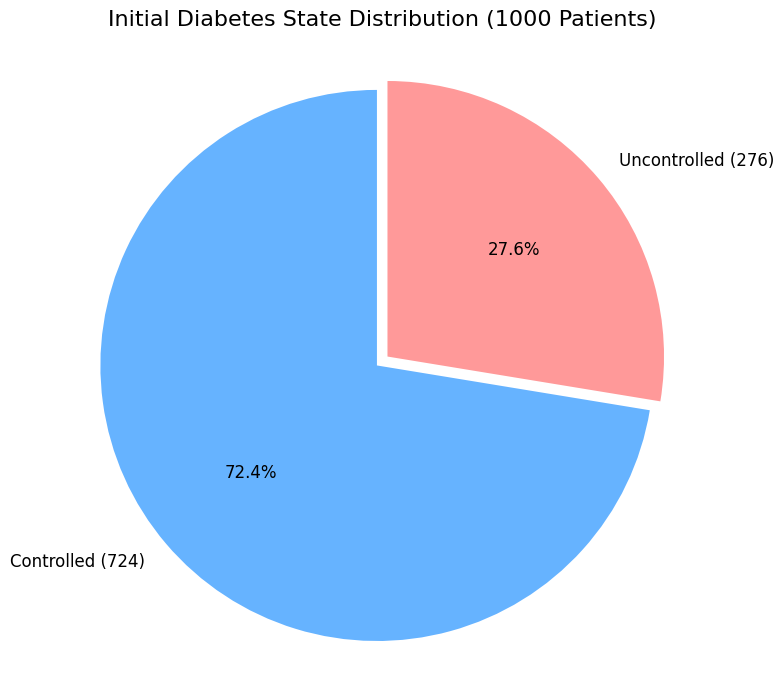

In [22]:
# Set path for Jupyter
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
df = load_and_clean_data(os.path.join(project_root, "data", "diabetes.csv"))
df = define_states(df)
initial_dist = estimate_state_distribution(df)

# Calculate counts for 1000 patients
states = ["Controlled", "Uncontrolled"]
n_patients = 1000
initial_counts = {state: round(initial_dist[state] * n_patients) for state in states}

# Display results
print("Initial State Distribution (1000 patients):")
for state in states:
    count = initial_counts[state]
    percentage = count / n_patients * 100
    print(f"{state}: {count} patients ({percentage:.1f}%)")

# Create pie chart
colors = ['#66b3ff', '#ff9999']
explode = (0.05, 0)  # Pop Controlled
plt.figure(figsize=(8, 8))
plt.pie([initial_counts[state] for state in states], labels=[f"{state} ({initial_counts[state]})" for state in states],
        colors=colors, explode=explode, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title("Initial Diabetes State Distribution (1000 Patients)", fontsize=16, pad=20)
plt.axis('equal')
plt.savefig("initial_distribution_pie.png", dpi=300, bbox_inches='tight')
plt.show()

## 3. Initialize Markov Model

In [23]:

states = ["Controlled", "Uncontrolled", "Severe", "Death"]
transition_matrix = load_transition_matrix("../data/probabilities.csv")  # Correct path
model = DiabetesMarkovModel(transition_matrix, states, n_steps=60)

## 4. Run Simulation and Print Final Distribution

In [24]:
trajectories, state_counts = model.simulate_cohort(n_patients=1000)
print("Final state distribution:", dict(zip(states, state_counts)))

Final state distribution: {'Controlled': 460, 'Uncontrolled': 142, 'Severe': 284, 'Death': 114}


## 5. Generate Visualizations

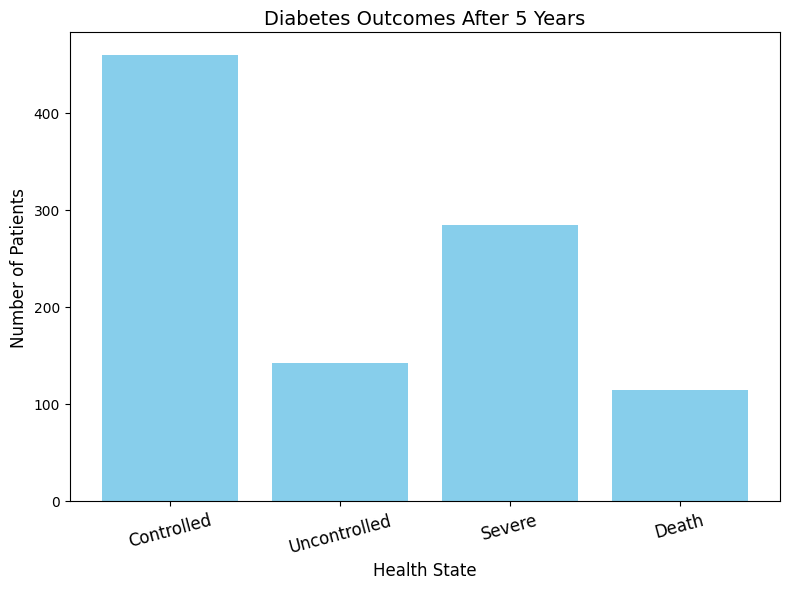

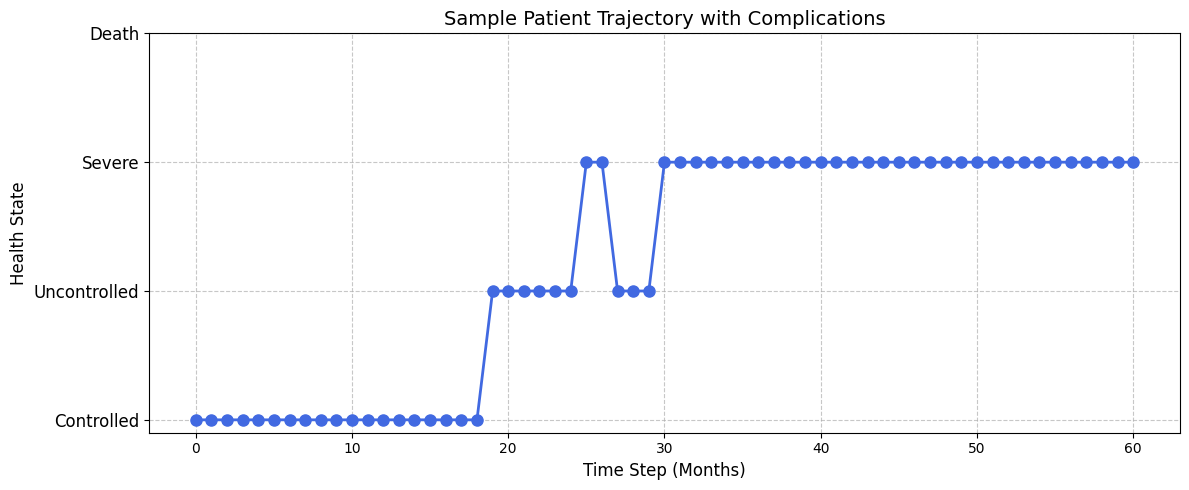

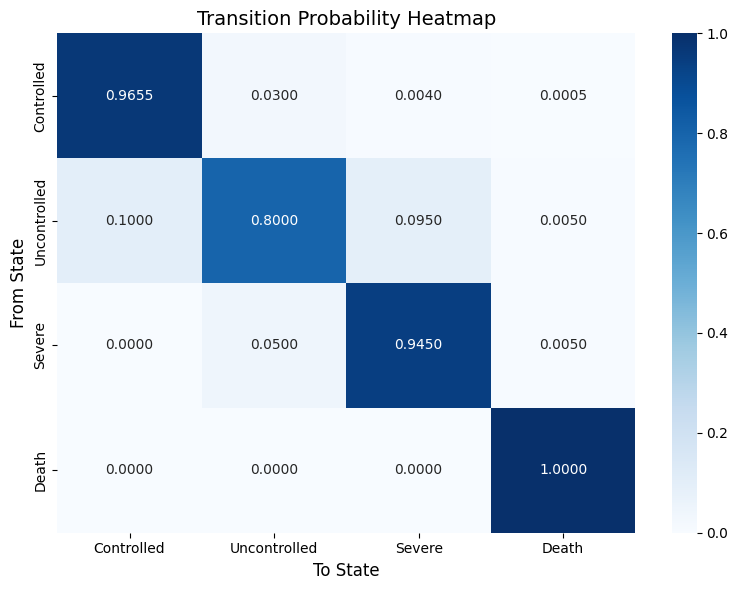

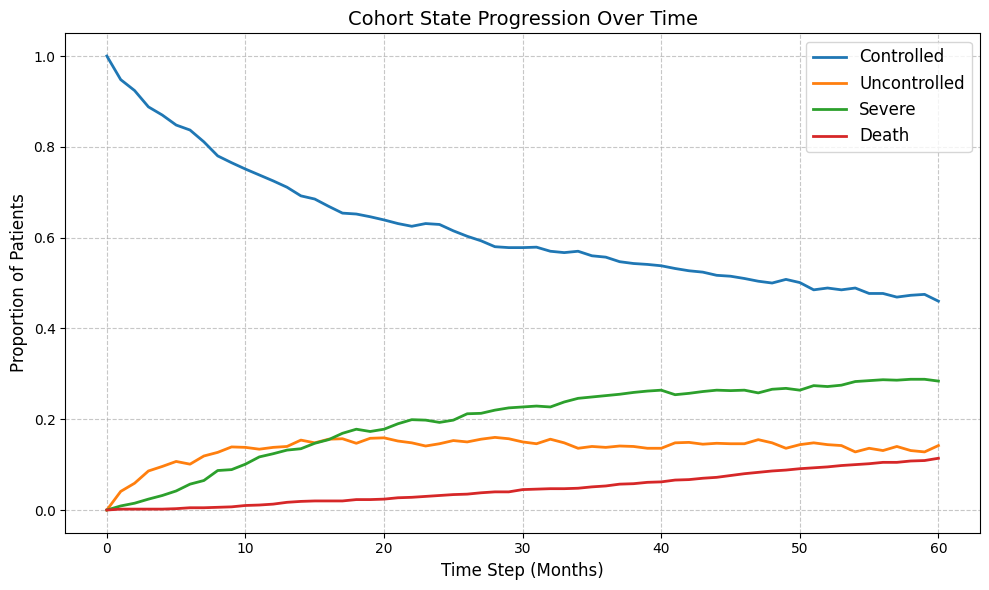

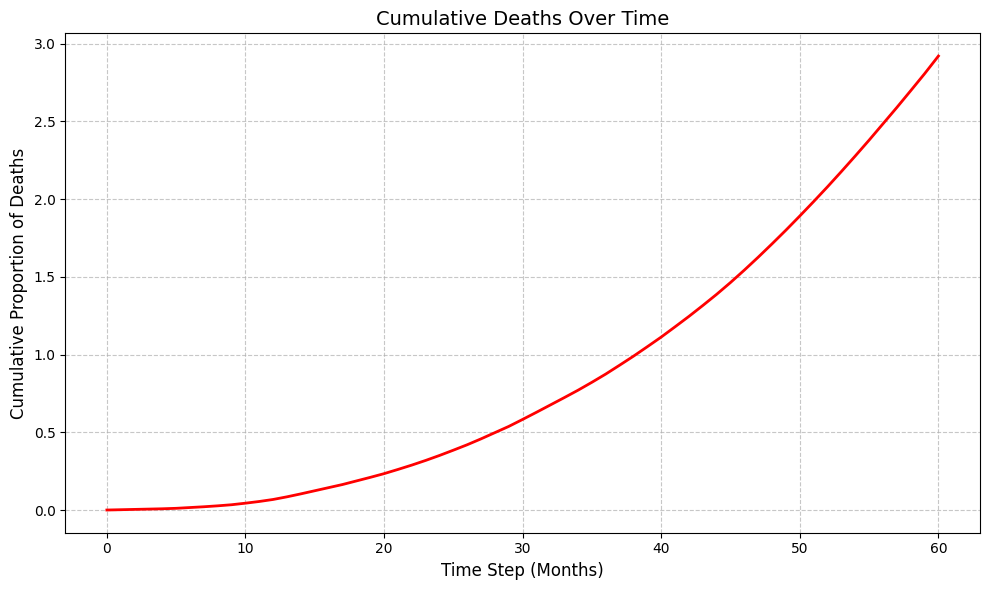

In [25]:
# Plot final state distribution
plot_state_distribution(state_counts, states)

# Plot a trajectory with Severe or Death
for traj in trajectories:
    if 2 in traj or 3 in traj:  # Contains Severe or Death
        plot_trajectory(traj, states, title="Sample Patient Trajectory with Complications")
        break
else:
    plot_trajectory(trajectories[0], states)  # Default to first trajectory

# New visualizations
plot_transition_heatmap(transition_matrix, states)
plot_cohort_progression(trajectories, states)
plot_cumulative_deaths(trajectories, states)